<a href="https://colab.research.google.com/github/itzdineshx/Internship_projects--DINESH-S-/blob/main/Task_2_E_mail_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **E-Mail Spam Detection**

 The goal is to automatically categorize incoming emails as either “spam” or “ham” (legitimate) based on their content.

Dataset link: [Data]( https://drive.google.com/file/d/1uzbh...)

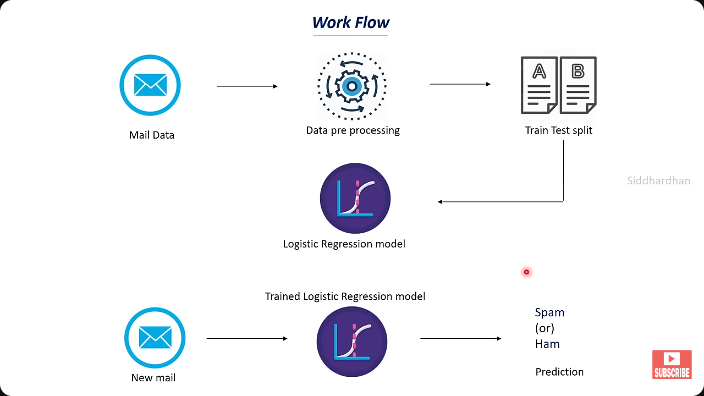

In [ ]:
#importing all wanted libraries
import pandas as pd#for data frame
import numpy as np#for matrix calculations
from sklearn.model_selection import train_test_split#for train the model
from sklearn.feature_extraction.text import TfidfVectorizer
#convertion of txt -> num
from sklearn.linear_model import LogisticRegression#for probability test
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report#for overall report

Data Collection and pre-processing

In [ ]:
#loading the data
data= pd.read_csv('/content/mail_data.csv', encoding='latin-1')

In [ ]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.shape

(5572, 2)

In [ ]:
data.values

array([['ham',
        'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'],
       ['ham', 'Ok lar... Joking wif u oni...'],
       ['spam',
        "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"],
       ...,
       ['ham',
        'Pity, * was in mood for that. So...any other suggestions?'],
       ['ham',
        "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"],
       ['ham', 'Rofl. Its true to its name']], dtype=object)

In [ ]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data.isnull().sum()

,0
Category,0
Message,0


In [ ]:
data.drop_duplicates(inplace=True)
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


replacing the null values with empty string

In [ ]:
mail_data = data.where((pd.notnull(data)),'')
mail_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# **Label Encoding**


*  0 -> spam mail
*  1 -> ham mail




In [ ]:
#labelling the spam and ham mails
mail_data.loc[mail_data['Category']=='spam','category']=0
mail_data.loc[mail_data['Category']=='ham','category']=1
mail_data.head()

,Category,Message,category
0,ham,"Go until jurong point, crazy.. Available only ...",1.0
1,ham,Ok lar... Joking wif u oni...,1.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.0
3,ham,U dun say so early hor... U c already then say...,1.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",1.0


seperating the data into text and lables

In [ ]:
X = mail_data['Category']
Y = mail_data['category']
X
Y

,category
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
5567,0.0
5568,1.0
5569,1.0
5570,1.0


### **Training the model**

splitting the data into:


*   Train Data
*   Test Data



In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)
print(X.shape,X_train.shape,X_test.shape)

(5157,) (4125,) (1032,)


Feature Extraction

In [ ]:
#transorming into 0s and 1s
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True) # Changed 'True' to True
feauture_X_train=feature_extraction.fit_transform(X_train)
feature_X_test=feature_extraction.transform(X_test)

converting y_test and y_train values as 'int'

In [ ]:
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')
Y_train

,category
1786,1
3576,1
420,0
5156,1
3354,1
...,...
809,1
993,1
1726,1
3525,1


Training by the logistic regression model

In [ ]:
#Creating a model
model = LogisticRegression()

In [ ]:
#loading the data into the model
model.fit(feauture_X_train,Y_train)
model

LogisticRegression()

In [ ]:
#Evaluating the trained model
prediction_on_training_data = model.predict(feauture_X_train)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print("accuracy on trained data: ",accuracy_on_training_data)

accuracy on trained data:  1.0


In [ ]:
#Evaluating the trained model
prediction_on_test_data = model.predict(feature_X_test)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print("accuracy on test data: ",accuracy_on_test_data)

accuracy on test data:  1.0


In [ ]:
input_mail = input("Enter the mail: ")

# Convert the input mail to a feature vector
input_mail_features = feature_extraction.transform([input_mail])

# Make prediction using the trained model
prediction = model.predict(input_mail_features)[0]

if prediction == 1:
  print("This mail is a ham mail.")
else:
  print("This mail is a spam mail.")


Enter the mail: A new sign-in on Windows personalaccdinesh@gmail.com We noticed a new sign-in to your Google Account on a Windows device. If this was you, you don’t need to do
This mail is a ham mail.


In [ ]:
input_mail = input("Enter the mail: ")

# Convert the input mail to a feature vector
# The input to the transform method needs to be a list
input_mail_features = feature_extraction.transform([input_mail])

# Make prediction using the trained model
prediction = model.predict(input_mail_features)

if (prediction[0]) == 1:
  print("This mail is a spam mail.")
else:
  print("This mail is a ham mail.")

Enter the mail: Free video camera phones with Half Price line rental for 12 mths and 500 cross ntwk mins 100 txts. Call MobileUpd8 08001950382 or Call2OptOut/674&
This mail is a spam mail.


In [ ]:
# Evaluate the model's performance using various metrics
precision = precision_score(Y_test, prediction_on_test_data)
recall = recall_score(Y_test, prediction_on_test_data)
f1 = f1_score(Y_test, prediction_on_test_data)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print(classification_report(Y_test, prediction_on_test_data))


Precision: 1.0
Recall: 1.0
F1-score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00       893

    accuracy                           1.00      1032
   macro avg       1.00      1.00      1.00      1032
weighted avg       1.00      1.00      1.00      1032

